<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/main/leaf_classification_PCVK_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noora Aulia Hidayat

TI-3I

2041720046

https://github.com/noora20FH/PCVK/blob/main/leaf_classification_PCVK_finalProject.ipynb 

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


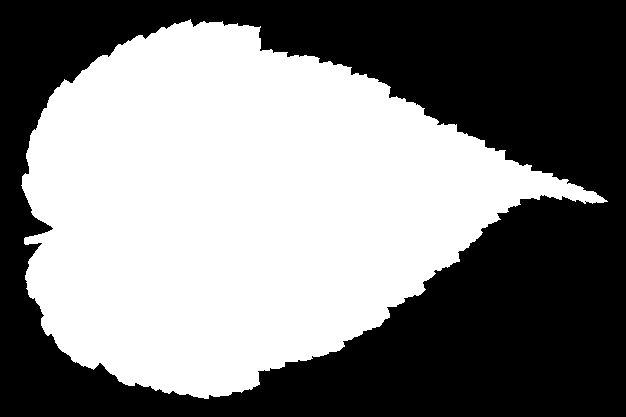

In [7]:
from google.colab import drive
from PIL import Image
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the directory path in Google Drive where your images are located
directory_path = '/content/drive/MyDrive/Leaf_Images'

# Get the filenames of the leaves under the directory
image_path_list = os.listdir(directory_path)

# Looking at the first image
i = 0
image_path = os.path.join(directory_path, image_path_list[i])

# Load the image
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Display the image
image.show()


In [17]:
from google.colab import drive
import os
import csv

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file containing image labels
csv_file_path = 'path_to_csv'

# Create an empty dictionary to store the mapping between filenames and labels
label_mapping = {}

# Read the CSV file and populate the label_mapping dictionary
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        if len(row) == 2:
            filename = row[0].strip()
            label = row[1].strip()
            label_mapping[filename] = label

# Set the directory path where your images are located
directory_path = 'path_to_image_directory'

# Create an empty list to store the labels
labels = []

# Get the filenames of the leaves under the directory
image_path_list = os.listdir(directory_path)

# Loop through each image
for image_filename in image_path_list:
    # Construct the full image path
    image_path = os.path.join(directory_path, image_filename)
    
    # Check if the image filename exists in the label_mapping dictionary
    if image_filename in label_mapping:
        # Assign the corresponding label to the image
        label = label_mapping[image_filename]
    else:
        # If the filename is not found in the label_mapping dictionary, assign a default label
        label = 'unknown'
    
    # Append the label to the list
    labels.append(label)

# Print the labels
print(labels)


UnidentifiedImageError: ignored